In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import unidecode as uni
import Util as utl
from sklearn import linear_model
from sklearn.model_selection import train_test_split

def limpiarDatos(p_data, alpha=0.5): 
    
    data=p_data
    
    data = utl.OutliersSupTotal(data, alpha)
    data = utl.OutliersSupCubierta(data, alpha)
    data = utl.OutliersPrecioUSD(data, alpha)
    data = utl.OutliersPrecioM2(data, alpha)
    
    data = utl.quitarMayusculasAcentos(data)
    data['ambientes'] = utl.generoAmbientes(data)
    data = utl.TransformacionData(data)
    data['superficieJardines'] = utl.generarSupJardines(data)
    data['superficieTerraza'] = utl.generarSupTerrazas(data)
    data['superficieJarTer'] = utl.generarSupJarTer(data)
    
    #IMPUTAR POR LA MEDIA ESTIMADA POR LOCALIDAD, BARRIO, PROPIEDAD, ETC
    data.imputar_ambientes = utl.imputarAmbientes(data)
    data.surface_covered_in_m2 = utl.ImputarSupCubierta(data)
    data.imputar_ambientes[data.imputar_ambientes==0]=np.nan
    data.surface_total_in_m2 = utl.ImputarSupTotal(data)
    data.surface_total_in_m2 = utl.ImputarTotalMenorCubierta(data)
    data.price_aprox_usd = utl.imputarPrecio(data)
    data.price_usd_per_m2 = utl.imputarPrecioM2(data)
    
    
    return data

In [16]:
data = pd.read_csv('/home/DS-DH/notebooks/digitalHouse/properatti.csv')
#data_original = pd.read_csv('/home/DS-DH/notebooks/digitalHouse/properatti.csv')

In [25]:
! jt -t onedorkpip install jupyterthemes

In [17]:
data = limpiarDatos(data,0.5)

/home/DS-DH/notebooks/digitalHouse/modelo-properatti/ipynb/Util.py:117: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.ambientesImputados = ImputarAmbientesProceso(data,10)


In [8]:
data_original = pd.read_csv('/home/DS-DH/notebooks/digitalHouse/properatti.csv')

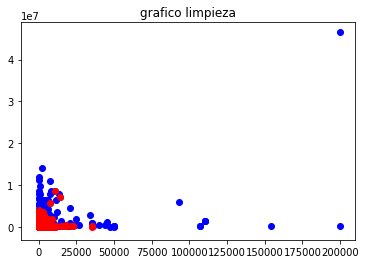

In [9]:
import matplotlib.pyplot as plt

#GENERO EJE X -> SUPERFICIE TOTAL
x1 = data_original.surface_total_in_m2

#GENERO EJE Y -> PRECIO M2 DE TEST
x2 = data_original.price_aprox_usd

# EJE Y -> PRECIO M2 PREDICHO
x3 = data.surface_total_in_m2

x4 = data.price_aprox_usd

#PLOT
plt.scatter(x1,x2,label='original', color='blue')
plt.scatter(x3,x4,label='limpiado', color='red')
plt.title('grafico limpieza')
plt.show()

In [12]:
! jt -t monokai

In [67]:
def agregarCol(columna):
    aLa2 = columna.apply(lambda x: x ** 2)
    return aLa2

In [99]:
nuevo_modelo = pd.concat([modeloMatriz ,modeloMatriz.iloc[:,1].apply(lambda x: x**2)],axis=1)
for i in range (1,10):
    nuevo = pd.concat([nuevo, nuevo.iloc[:,-1:].apply(lambda x: x**2)],axis=1)

In [138]:
y =nuevo.iloc[:,0]

In [146]:
xs = nuevo.iloc[:,1:77]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()


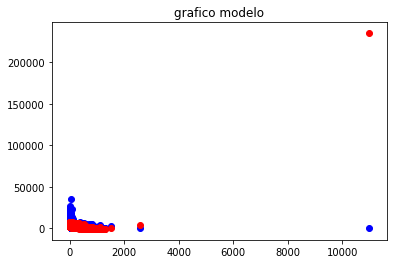

In [53]:
#data['imputar_ambientes'] = data.ambientes
matriz = utl.matriz(data)
#matriz = matriz[(matriz.precio_m2<5000)&(matriz.superficie_total<5000)]
modeloMatriz=utl.generarDummies(matriz)
xs = modeloMatriz.iloc[:,1:]
xs = pd.concat([modeloMatriz.iloc[:,1:],modeloMatriz.superficie_total.apply(lambda x: x**2)],axis=1)
y = modeloMatriz.iloc[:,0]
#TRANSFORMO VARIABLES INDEPENDIENTES EN FORMATO MATRIZ
xs = xs.as_matrix()
#TRANSFORMO VARIABLE DEPENDIENTE EN FORMATO MATRIZ
y = y.as_matrix()
#IMPORTAR LIBRERIAS DE SKLEARN
from sklearn import linear_model
from sklearn.model_selection import train_test_split
#PARTICIONAR DATOS DE ENTRENAMIENTO Y TESTING
x_train, x_test, y_train, y_test = train_test_split(xs, y, test_size=0.3)
#FIT 
modelo = linear_model.LinearRegression()
modelo.fit(x_train,y_train)
#PREDECIR DATOS "Y" DE "X" TEST 
y_predict = modelo.predict(x_test)
#PENDIENTES
pendientes = modelo.coef_
#ORDENADA 
ordenada = modelo.intercept_
#R2
'EL RESULTADO DEL MODELO ES DE {}'.format(modelo.score(x_train,y_train))



import matplotlib.pyplot as plt

#GENERO EJE X -> SUPERFICIE TOTAL
x1 = x_test[:,0]

#GENERO EJE Y -> PRECIO M2 DE TEST
x2 = y_test

# EJE Y -> PRECIO M2 PREDICHO
x3 = y_predict


#PLOT
plt.scatter(x1,x2,label='test modelo', color='blue')
plt.scatter(x1,x3,label='prediccion modelo', color='red')
plt.title('grafico modelo')
plt.show()

In [54]:
from sklearn import metrics
import numpy as np
print ('MAE:', metrics.mean_absolute_error(y_test, y_predict))
print ('MSE:', metrics.mean_squared_error(y_test, y_predict))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))
print ('R2:', metrics.r2_score(y_test, y_predict))

MAE: 1003.5337968868021
MSE: 11039727.150253223
RMSE: 3322.608485851624
R2: -1.414742376865521


In [56]:
! jt -t monokai

In [55]:
! pip install jupyterthemes

## DESCENSO GRADIENTE 

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, preprocessing

In [44]:
for x in xs:
    print (x.applymap(lambda x: x+1))

AttributeError: 'numpy.ndarray' object has no attribute 'applymap'

In [46]:
mean = np.mean(xs)
std = np.std(xs)

In [47]:
xs = [(x - mean) / std for x in xs]

In [50]:
mean = np.mean(y)
std = np.std(y)
y = [(y - mean) / std for y in y]

# REGRESION MULTIPLE

In [57]:
# Definimos una función que acepta una lista de features, hace el split entre train y test,
# reservando un 25% de las observaciones para testeo, y devuelve la prueba RMSE.
from sklearn import linear_model
from sklearn.model_selection import train_test_split

from sklearn import metrics
def train_test_rmse(feature_cols):
    y_test =1
    y_pred=1
    X = feature_cols
    y = modeloMatriz.precio_m2
    # Como estamos trabajando con observaciones ordenadas en el tiempo, ponemos
    # shuffle=False para evitar data leakage
    X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False)
    linreg = linear_model.LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    return metrics.r2_score(y_test, y_pred)

In [58]:
print(train_test_rmse(xs))
print(train_test_rmse(pd.concat([modeloMatriz.iloc[:,1],modeloMatriz.iloc[:,12:]],axis=1)))
print(train_test_rmse(modeloMatriz.iloc[:,1:]))

-0.6978670370295468
-0.6983801597347212
-0.6978670370295468


In [34]:
pd.concat([modeloMatriz.iloc[:,1],modeloMatriz.iloc[:,12:]],axis=1)

,superficie_total,CASA,PH,DTO,belgrano,palermo_soho,mataderos,palermo,flores,caballito,...,parque_centenario,villa_ortuzar,chacarita,boedo,villa_lugano,palermo_viejo,villa_soldati,pompeya,villa_real,velez_sarsfield
7,45.0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,50.0,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
14,42.0,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
16,140.0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19,104.0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
21,118.0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
29,43.0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
52,50.0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
54,81.0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
59,70.0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [31]:
%matplotlib inline

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = 10, 10

import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [32]:
matriz = utl.matriz(data)
modeloMatriz=utl.generarDummies(matriz)
xs = modeloMatriz.iloc[:,1:]
y = modeloMatriz.iloc[:,0]
#TRANSFORMO VARIABLES INDEPENDIENTES EN FORMATO MATRIZ
xs = xs.as_matrix()
#TRANSFORMO VARIABLE DEPENDIENTE EN FORMATO MATRIZ
y = y.as_matrix()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [33]:
X_train, X_test, y_train, y_test = train_test_split(xs, y, test_size=0.30, random_state=53)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(5390, 74) (5390,)
(2311, 74) (2311,)


In [34]:
al_ridge = np.linspace(0.001, 0.3, 300)
al_lasso = np.linspace(0.1, 0.5, 300)
kf = KFold(n_splits=5, shuffle=True, random_state=12)

In [35]:
lm = LinearRegression()
lm_ridge_cv= RidgeCV(alphas=al_ridge, cv=kf, normalize=True)
lm_lasso_cv = LassoCV(alphas=al_lasso, cv=kf, normalize=True)

In [36]:
# Hacemos los fits respectivos
lm.fit(X_train, y_train)
lm_ridge_cv.fit(X_train, y_train)
lm_lasso_cv.fit(X_train, y_train)

LassoCV(alphas=array([0.1    , 0.10134, ..., 0.49866, 0.5    ]), copy_X=True,
    cv=KFold(n_splits=5, random_state=12, shuffle=True), eps=0.001,
    fit_intercept=True, max_iter=1000, n_alphas=100, n_jobs=1,
    normalize=True, positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [37]:
print('Alpha Ridge:',lm_ridge_cv.alpha_,'\n'
      'Alpha LASSO:',lm_lasso_cv.alpha_,'\n')

Alpha Ridge: 0.014000000000000002 
Alpha LASSO: 0.1 



In [21]:
# Calculamos el R2

print(" Score Train Lineal: %.2f\n" % lm.score(X_train, y_train),
      "Score Train Ridge : %.2f\n" % lm_ridge_cv.score(X_train, y_train),
      "Score Train Lasso : %.2f\n" %  lm_lasso_cv.score(X_train, y_train))


 Score Train Lineal: 0.49
 Score Train Ridge : 0.49
 Score Train Lasso : 0.49



In [11]:
data1 = utl.OutliersSupTotal(data1, 0.5)
data1 = utl.OutliersSupCubierta(data1,0.5)
data1 = utl.OutliersPrecioUSD(data1,0.5)
data1 = utl.OutliersPrecioM2(data1,0.5)

In [ ]:
dfImputacionesAmbientes = pd.DataFrame(data[data.ambientes_ceros!=0].groupby(['state_name','place_name','categorias_sup_cubierta_por_m2'])['ambientes_ceros'].transform(mean))


In [48]:
data[data.ambientes.notnull()].shape

(39915, 70)

In [34]:
data['categorias_sup_cubierta_por_m2'] = pd.qcut(data[data.surface_covered_in_m2>10].surface_covered_in_m2,5)


In [13]:
matriz_modelo = utl.generarDummies(matriz)

In [28]:
matriz[(matriz.ambientes.notnull())&(matriz.superficie_total.notnull())&(matriz.precio_m2.notnull())&(matriz.localidad.str.contains('capital'))].shape

(3555, 26)

In [20]:
#SKLEARN

#GENERO VARIABLES INDEPENDIENTES
x_feactures = matriz_modelo.iloc[:,2:]
df1 = matriz_modelo['superficie_total']
xs = pd.concat([df1,x_feactures],axis=1)

#GENERO VARIABLE DEPENDIENTE
y = matriz_modelo.precio_m2

#TRANSFORMO VARIABLES INDEPENDIENTES EN FORMATO MATRIZ
xs = xs.as_matrix()

#TRANSFORMO VARIABLE DEPENDIENTE EN FORMATO MATRIZ
y = y.as_matrix()

#IMPORTAR LIBRERIAS DE SKLEARN
from sklearn import linear_model
from sklearn.model_selection import train_test_split

#PARTICIONAR DATOS DE ENTRENAMIENTO Y TESTING
x_train, x_test, y_train, y_test = train_test_split(xs, y, test_size=0.3)


#FIT 
modelo = linear_model.LinearRegression()
modelo.fit(x_train,y_train)


#PREDECIR DATOS "Y" DE "X" TEST 
y_predict = modelo.predict(x_test)

#R2
'EL RESULTADO DEL MODELO ES DE {}'.format(modelo.score(x_train,y_train))

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  from ipykernel import kernelapp as app


'EL RESULTADO DEL MODELO ES DE 0.8259901732091823'

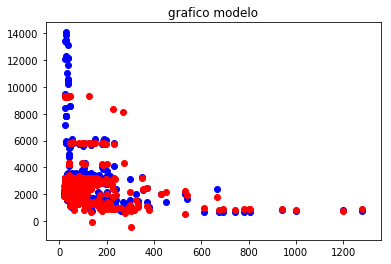

In [21]:
import matplotlib.pyplot as plt

#GENERO EJE X -> SUPERFICIE TOTAL
x1 = x_test[:,0]

#GENERO EJE Y -> PRECIO M2 DE TEST
x2 = y_test

# EJE Y -> PRECIO M2 PREDICHO
x3 = y_predict


#PLOT
plt.scatter(x1,x2,label='test modelo', color='blue')
plt.scatter(x1,x3,label='prediccion modelo', color='red')
plt.title('grafico modelo')
plt.show()